<a href="https://colab.research.google.com/github/rohailkhan/Acomputer_vision/blob/main/16_17_VGG_%2CInception_and_Residual_Deeplearning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import asarray
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils

# **Summary 17**
How to implement VGG Blocks
===========================================
1- Just layed CNN blocks with 3x3 filters and maxpooling (2,2) with 2,2 strides
```
# function for creating a vgg block
def vgg_block(layer_in, n_filters, n_conv):
# add convolutional layers
for _ in range(n_conv):
layer_in = Conv2D(n_filters, (3,3), padding=✬same✬, activation=✬relu✬)(layer_in)
# add max pooling layer
layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
return layer_in
```




In [ ]:
import tensorflow as tf
from keras import utils
tf.keras.utils.plot_model

<function keras.utils.vis_utils.plot_model>

## Make a VGG model for a color image of 256x256 with 64 filters, 2 Conv layers and the defualt Maxpoolig

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 64)        0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


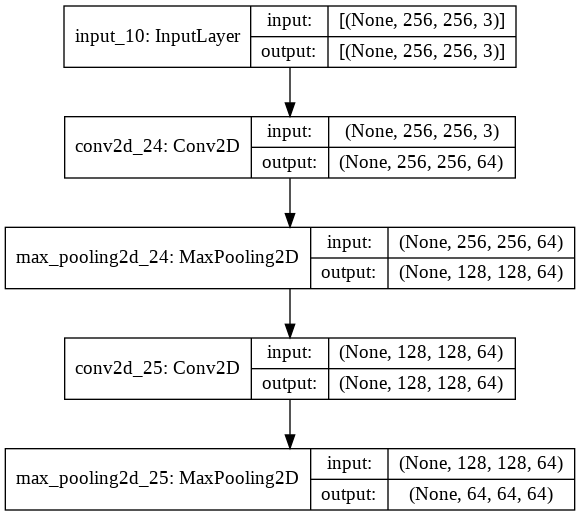

In [ ]:
# Example of creating a CNN model with a VGG block

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils
# function for creating a vgg block
def vgg_block(layer_in, n_filters, n_conv):
  # add convolutional layers
  for _ in range(n_conv):
    layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
    # add max pooling layer
    layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
  return layer_in

# define model input
visible = Input(shape=(256, 256, 3))

# add vgg module
layer = vgg_block(layer_in=visible, n_filters=64, n_conv=2)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
tf.keras.utils.plot_model(model, show_shapes=True, to_file='vgg_block.png')

In [ ]:
# make a 3 layered cnn with 64,128 and 256 filters

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils

# def vgg_model(input_layer , n_filters , n_conv):
#   for _ in range(n_conv):
#     input_layer=Conv2D(filters=n_filters,kernel_size=(3,3), padding='same', activation='relu')(input_layer)
#     input_layer= MaxPooling2D(pool_size=(2, 2), strides=(2,2))(input_layer)
#     return input_layer
# visible=Input(shape=(256,256,3))
# layer1=vgg_model(input_layer=visible, n_filters=64, n_conv=2)
# layer2=vgg_model(input_layer=layer1, n_filters=128, n_conv=2)
# layer3=vgg_model(input_layer=layer2, n_filters=256, n_conv=4)
# model=Model(inputs=visible, outputs=layer3)

def vgg_block(layer_in, n_filters, n_conv):
# add convolutional layers
  for _ in range(n_conv):
    layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
    # add max pooling layer
    layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
    return layer_in
    # define model input
    visible = Input(shape=(256, 256, 3))
    # add vgg module
    layer = vgg_block(visible, 64, 2)
    # add vgg module
    layer = vgg_block(layer, 128, 2)
    # add vgg module
    layer = vgg_block(layer, 256, 4)
    # create model
    model = Model(inputs=visible, outputs=layer)
# summarize

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, to_file='vgg_block1.png')


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 256)       295168    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 32, 32, 256)       0  

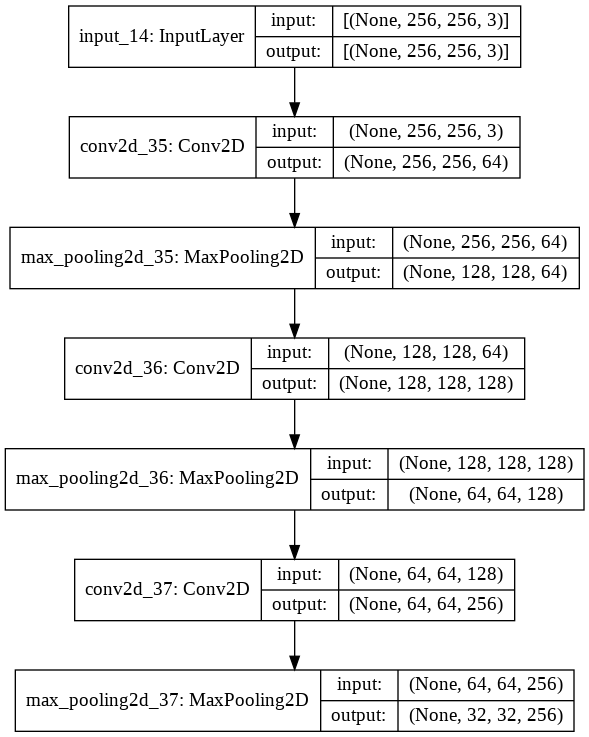

In [ ]:
 def vgg_block(layer_in, n_filters, n_conv):
# add convolutional layers
  for _ in range(n_conv):
    layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
    # add max pooling layer
    layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
    return layer_in
# define model input
visible = Input(shape=(256, 256, 3))
# add vgg module
layer = vgg_block(visible, 64, 2)
# add vgg module
layer = vgg_block(layer, 128, 2)
# add vgg module
layer = vgg_block(layer, 256, 4)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, to_file='vgg_block1.png')

# Naive inception model 18-182
Inception model:
1-Parallel CNN layers with dif size filters plus a max pooling layer
2- filter size restricted to 1x1 3x3 5x5
3- add alternative parallel pooling path

Only difference can be see (from VGG) that in the end all Conv layers are cocatenated with the pooling layer


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 256         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 128 3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 2432        input_1[0][0]                    
______________________________________________________________________________________________

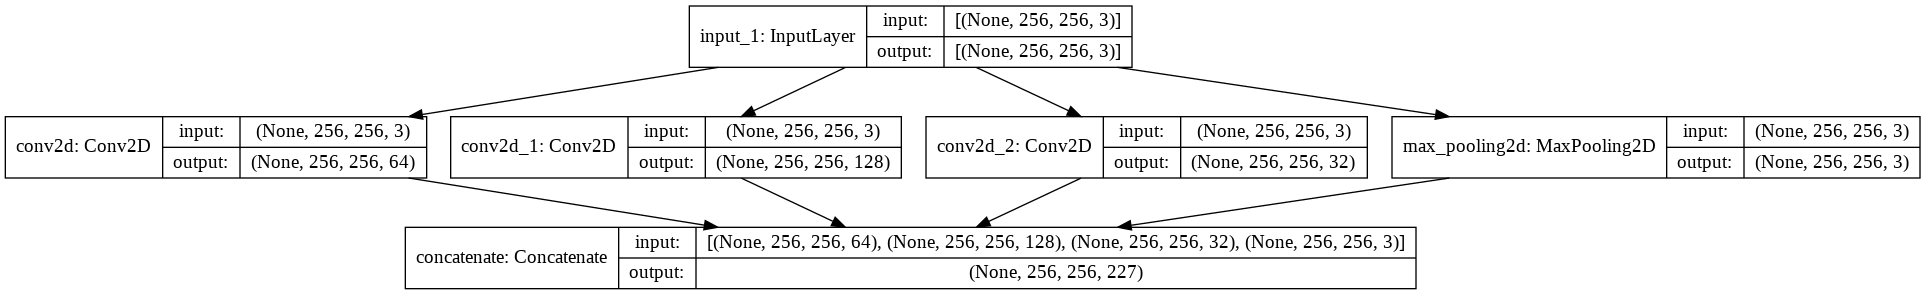

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras import utils
import tensorflow as tf
# function for creating a naive inception block
def naive_inception_module(layer_in, f1, f2, f3):
  # 1x1 conv
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3x3 conv
  conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
  # 5x5 conv
  conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
  # 3x3 max pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out
# define model input
visible = Input(shape=(256, 256, 3))
# add inception module
layer = naive_inception_module(visible, 64, 128, 32)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
tf.keras.utils.plot_model(model, show_shapes=True, to_file='vgg_block1.png')

# In the improved version we just decrease filters before pooling and incrase after that. In a function we just
# proovide option of Filter-in and Filter-out to increase or decrease the filters..in in-filter we only use 1,1


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 256, 256, 96) 384         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 256, 256, 16) 64          input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 256, 256, 3)  0           input_3[0][0]                    
____________________________________________________________________________________________

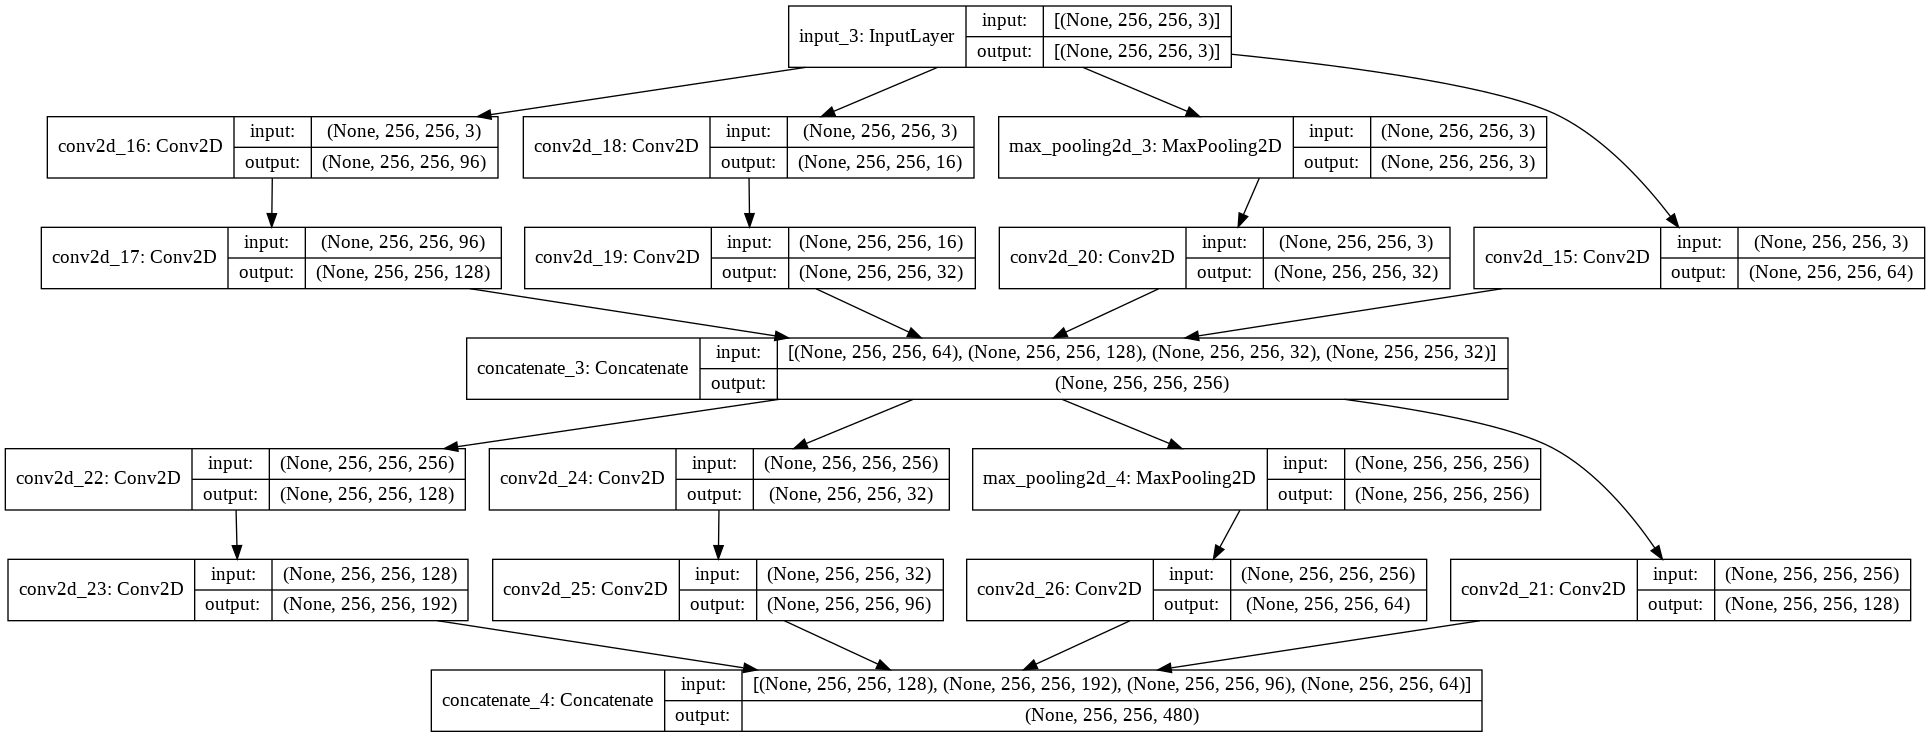

In [ ]:
# imporoved inception mode
# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
  # 1x1 conv
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3x3 conv
  conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
  conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
  # 5x5 conv
  conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
  conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
  # 3x3 max pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out
# define model input
visible = Input(shape=(256, 256, 3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
tf.keras.utils.plot_model(model, show_shapes=True, to_file='ince.png')

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 256, 256, 96) 384         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 256, 256, 16) 64          input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 256, 256, 3)  0           input_5[0][0]                    
____________________________________________________________________________________________

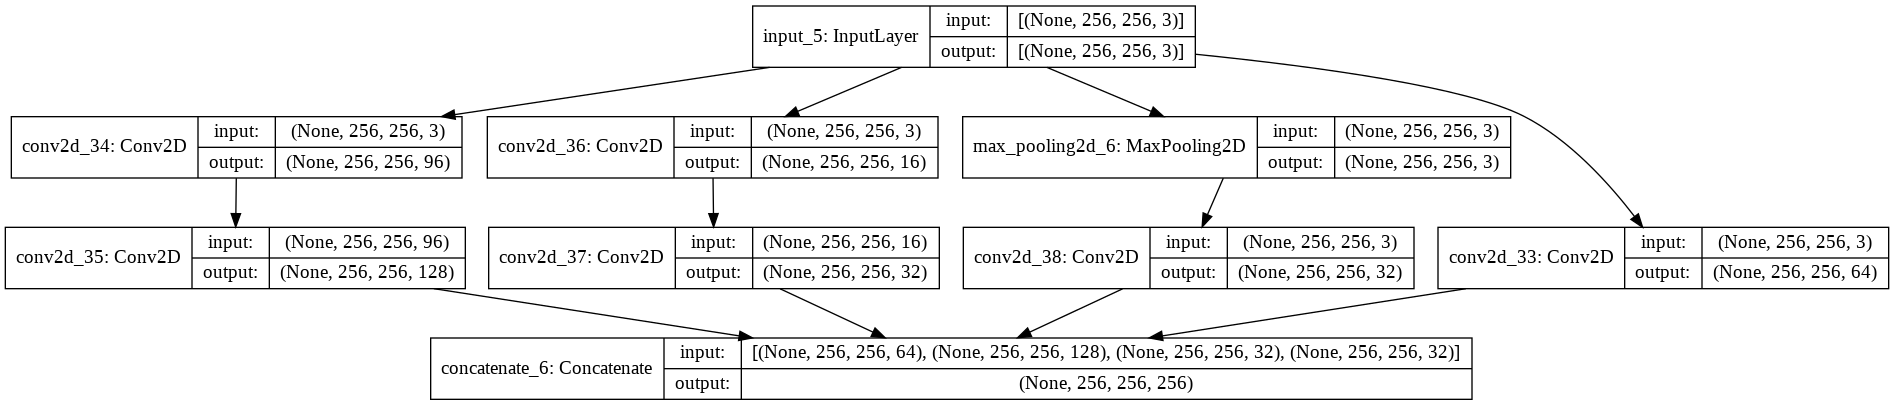

In [ ]:
# imporoved inception mode
# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
  # 1x1 conv
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3x3 conv
  conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
  conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
  # 5x5 conv
  conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
  conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
  # 3x3 max pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out
# define model input
visible = Input(shape=(256, 256, 3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
#layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
tf.keras.utils.plot_model(model, show_shapes=True, to_file='ince.png')

# **Summary 16**
1x1 Convolutions to manage Model Complexity
===========================================
1- Large no of features problem if large suze filters (5x5 , 7x7) are used
2- Solution : 1x1 Feature Map pooling acting as channel-wise pooling and can be used to dimensionality reduction

3- One filtr in CNN has an output which is a single number

4-For a gray scale image ,if we use 3x3 filter will be applied in blocks or shape=3 x 3 x 1 (1 channel) ....or 3 x 3 x 1 (1 channel) x 1 (sample)

5-For a color image ,if we use 3x3 filter will be applied in blocks or shape=3 x 3 x 3 ( 3 channels) ....or 3 x 3 x 1 (channel) x 1 (sample)

6- So more the depth, more the blocks..eg if input is from previous poooling layer with 64 depth...then filter will 3x3x64

7-We already used pooling layers,that halves the width and feature maps

8-how to decrease features 	model.add(Conv2D(512, (3,3),activation='relu')
				model.add(Conv2D(64, (1,1),activation='relu')
if a 7x7 filter applied on 512, it will make 1 million parameters...if applied on 64..then only 200 k paramters

9- it can alsi be used to increase features

# **Summary**
**1-D vector of Length-8**
====================
data shape=8

reshape to = 1,8,1 (sample, length , channel)

input shape = (8,1) only 1 sample

filter of size 3  with depth(channel 1) and 1 sample  has shape = 3,1,1
(filter length x channel x sample (3,1,1)
==========================
**2-D image of 8x8 gray scale will have dimensions 8x8x1**
====================
data shape= 8 x  8 x 1

reshape to = 1,8,8,1 (sample, length ,width, channel)

input shape = (8,8,1) only 1 sample

filter of size 3 x 3  with depth(channel 1) and 1 sample  has shape = 3,3,1,1
(filter width x filter length x channel x sample (3,3,1,1)

==========================
# **Size of Filter**
The depth is usually given implicitly. For example many Images are considered to have depth 3 (for the three color dimensions in each pixel). Then by a 5x5 filter we mean a 5x5x3 Filter. In your case the 5x5-Filter is really a 5x5x32 filter.

Depth one is usually explicitly stated (as in "5x5x1 filter").

# 17 Making VGG models.

1- Input is Conv layer with 3x3 filters and relu
2-Input connected to Max poolig og 2x2 size and 2,2 strides




https://stackoverflow.com/questions/47143361/explain-this-4d-numpy-array-indexing-intuitively

In [ ]:
np.random.randint(low=0,high=2,size=(8,8,1))

In [ ]:
data=asarray([[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0]])
# data shape is 8,8   
data=data.reshape(1,8,8,1)

In [ ]:
data = [[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)

In [ ]:
...
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))
# summarize model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


3x3 filter with vertical detection

0 1 0

0 1 0

0 1 0

In [ ]:
# filter of size 3 x 3 with 
# depth(channel 1) and 1 sample has shape = 3,3,1,1 (filter width x filter length x channel x sample (3,3,1,1)

In [ ]:
detector=asarray([[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]]])
#detector.shape , detector1.shape
weights = [(detector), asarray([0.0])]
model.set_weights(weights)

In [ ]:
yhat=model.predict(data)


In [ ]:
yhat.shape # batch , rows ,columns ,filters

(1, 6, 6, 1)

In [ ]:
# printing the activation in a single line
for r in range(yhat.shape[1]):
  print( [ yhat[0,r,c,0] for c in range(yhat.shape[2])] )

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
